In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sma
import statsmodels.tsa as smt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
data = sma.datasets.sunspots.load_pandas().data
data.index = pd.to_datetime(data.YEAR, format='%Y')
y = data.drop('YEAR', axis=1)
y = y.squeeze()
y

YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
              ... 
2004-01-01    40.4
2005-01-01    29.8
2006-01-01    15.2
2007-01-01     7.5
2008-01-01     2.9
Name: SUNACTIVITY, Length: 309, dtype: float64

In [8]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 309 entries, 1700-01-01 to 2008-01-01
Series name: SUNACTIVITY
Non-Null Count  Dtype  
--------------  -----  
309 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


In [9]:
result = smt.stattools.adfuller(y.values, autolag='AIC')
print(f'ADF-statistics: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical values:')
    print(f'{key}, {value}')

ADF-statistics: -2.8377807249381943
p-value: 0.053076421728120673
Critical values:
1%, -3.4523371197407404
Critical values:
5%, -2.871222860740741
Critical values:
10%, -2.571929211111111


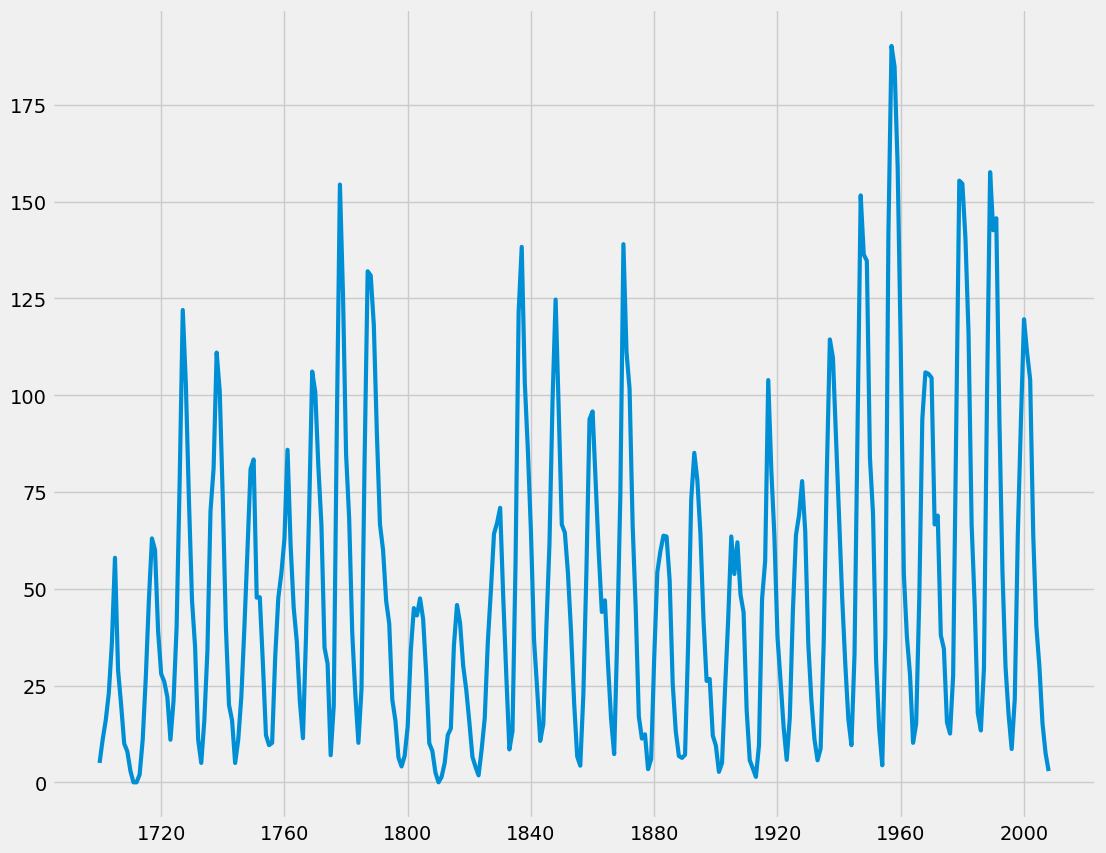

In [10]:
plt.figure(figsize=(12, 10))
plt.plot(y, linewidth=3)

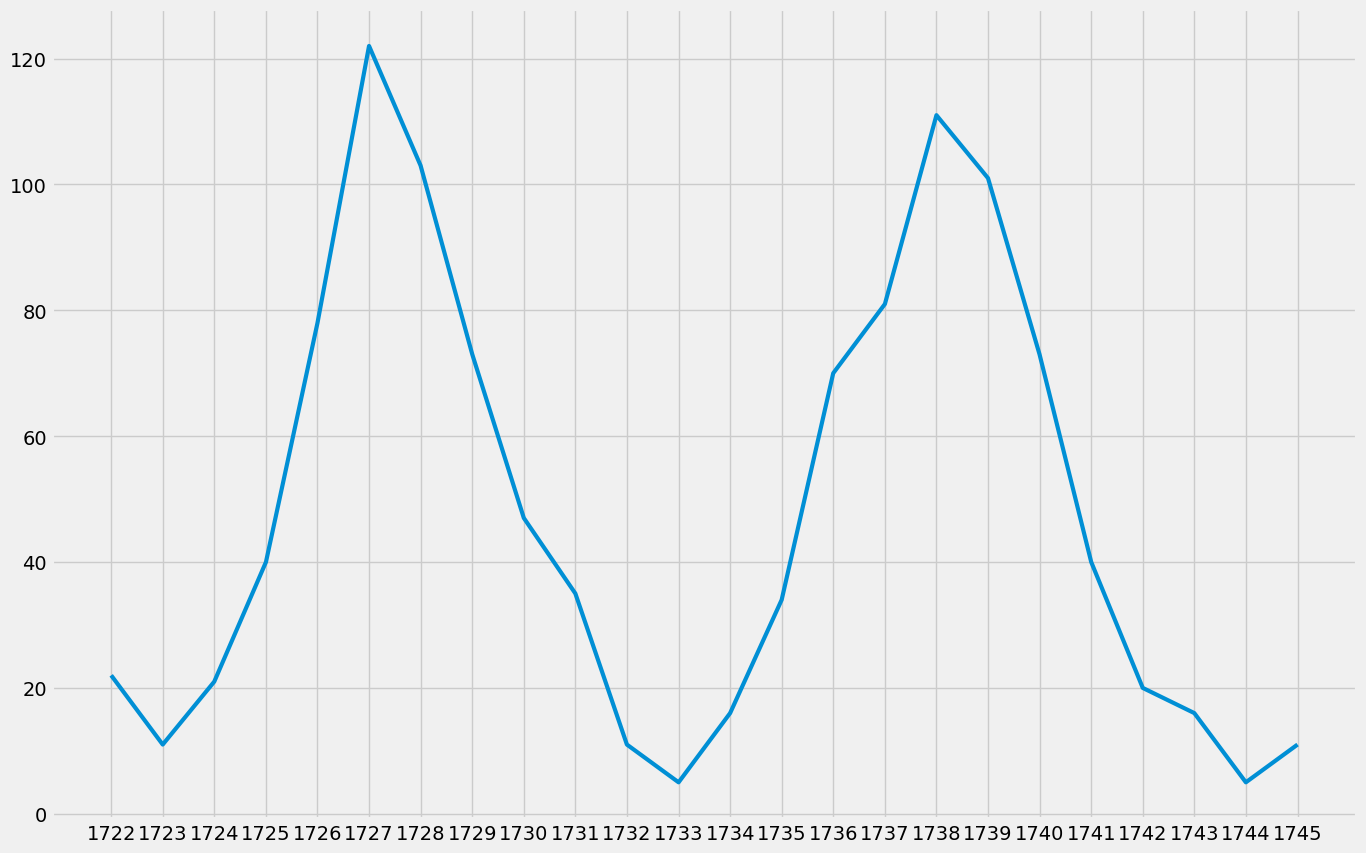

In [11]:
plt.figure(figsize=(15, 10))
plt.xticks(y['1722-01-01':'1745-01-01'].index, labels=np.arange(1722, 1746))
plt.plot(y['1722-01-01':'1745-01-01'], linewidth=3)

In [12]:
# Визначення p, d і q у діапазоні 0-2
p = d = q = range(0, 2)
# Генеруємо різні комбінації p, q и q
pdq = list(itertools.product(p, d, q))
# Генеруємо комбінації різних сезонних параметрів p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Приклади комбінацій параметрів для сезонних ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Приклади комбінацій параметрів для сезонних ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
warnings.filterwarnings("ignore") # Вимикаємо попередження
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = smt.arima.model.ARIMA(y,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('Min AIC: ', min(aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3156.11641151436
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2972.759481379384
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3049.1506172991085
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2931.5259900073333
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2972.857970648445
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2960.6951473443796
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2942.7951482313892
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2886.637132305667
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2868.2616353280073
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2715.34277679385
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2811.1324777456434
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2678.6397467991046
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2728.47397808656
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2710.5393886563224
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2713.7993981749396
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2642.5608313152884
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2824.8598075257105
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2701.164223312664
AR

In [20]:
mod = smt.arima.model.ARIMA(y, 
                                order=(1, 0, 1), 
                                seasonal_order=(1, 1, 1, 12), 
                                enforce_stationarity=False, 
                                enforce_invertibility=False) 
results = mod.fit()

In [22]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.7025,0.057,12.281,0.000,0.590,0.815
ma.L1,0.5017,0.057,8.780,0.000,0.390,0.614
ar.S.L12,0.2073,0.072,2.891,0.004,0.067,0.348
ma.S.L12,-1.0000,0.069,-14.510,0.000,-1.135,-0.865
sigma2,361.6977,0.000,1.9e+06,0.000,361.697,361.698


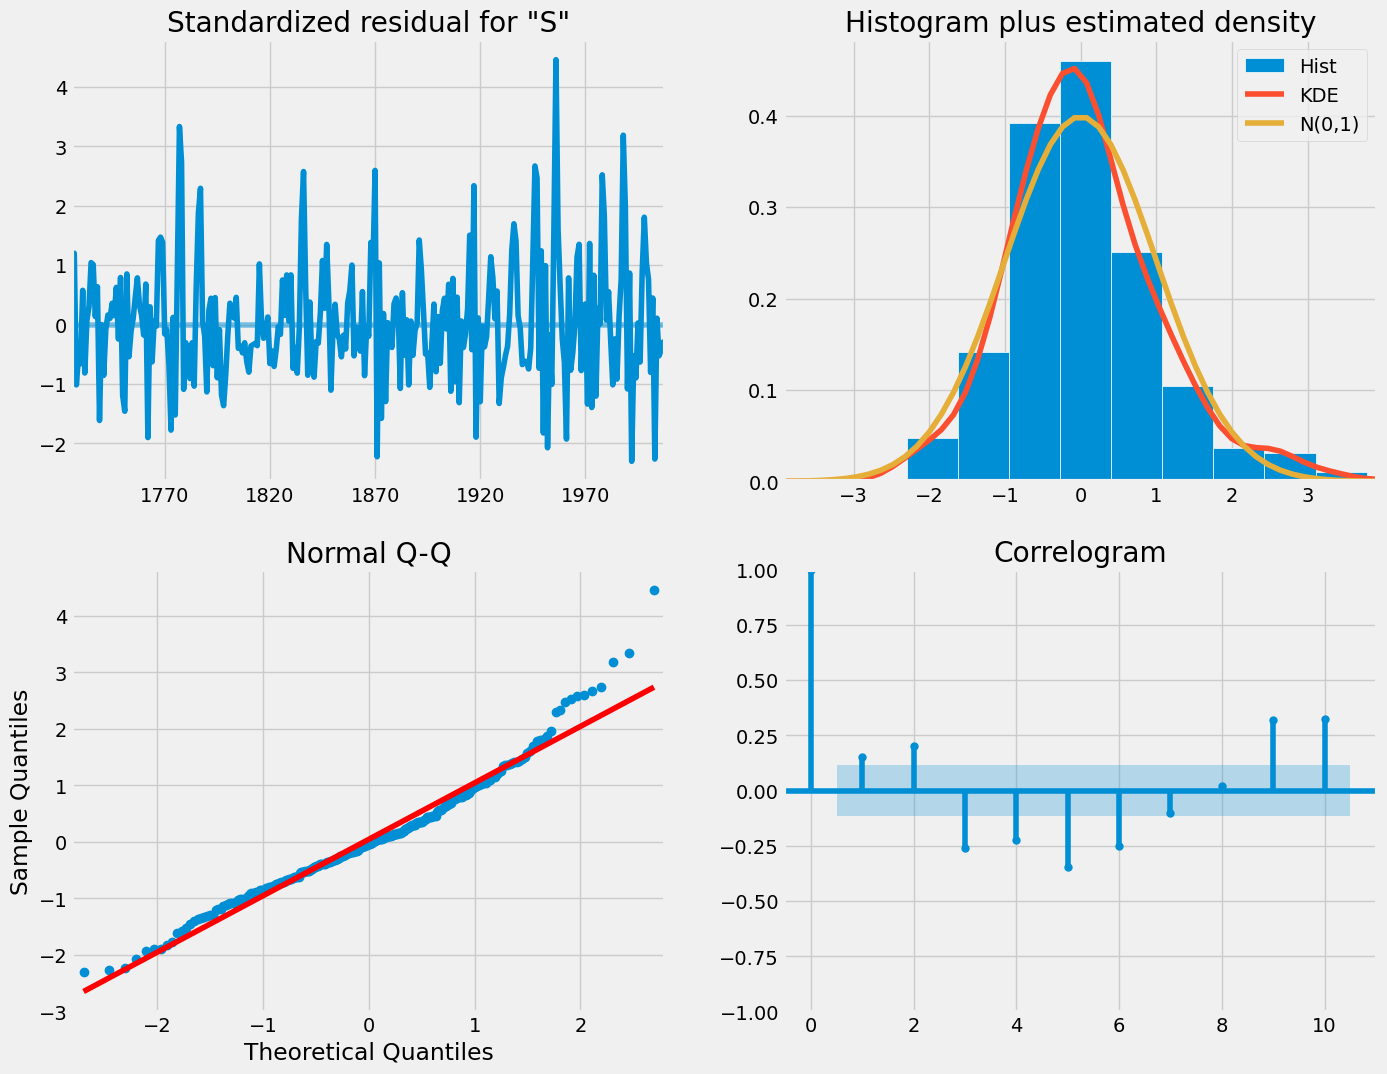

In [23]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [24]:
pred = results.get_prediction(start=pd.to_datetime('1950-01-01'), dynamic=False)
pred_ci = pred.conf_int()

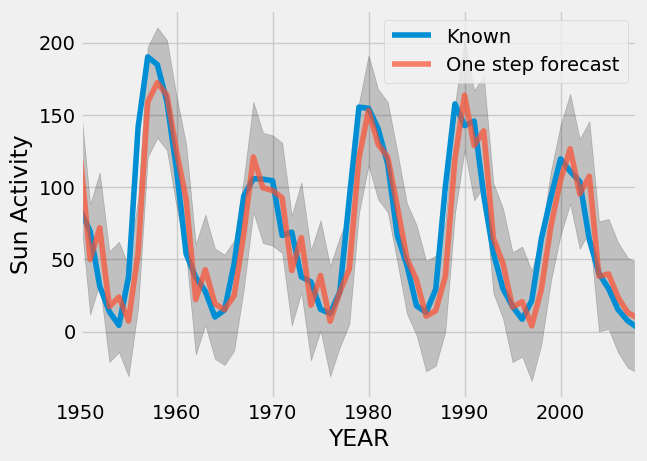

In [25]:
ax = y['1950-01-01':].plot(label='Known')
pred.predicted_mean.plot(ax=ax, label='One step forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('YEAR')
ax.set_ylabel('Sun Activity')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y['1950-01-01':] # Обчислюємо середню квадртичну похибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Mean squared error of predictions = {}'.format(round(mse, 2)))

Mean squared error of predictions = 641.15


In [27]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

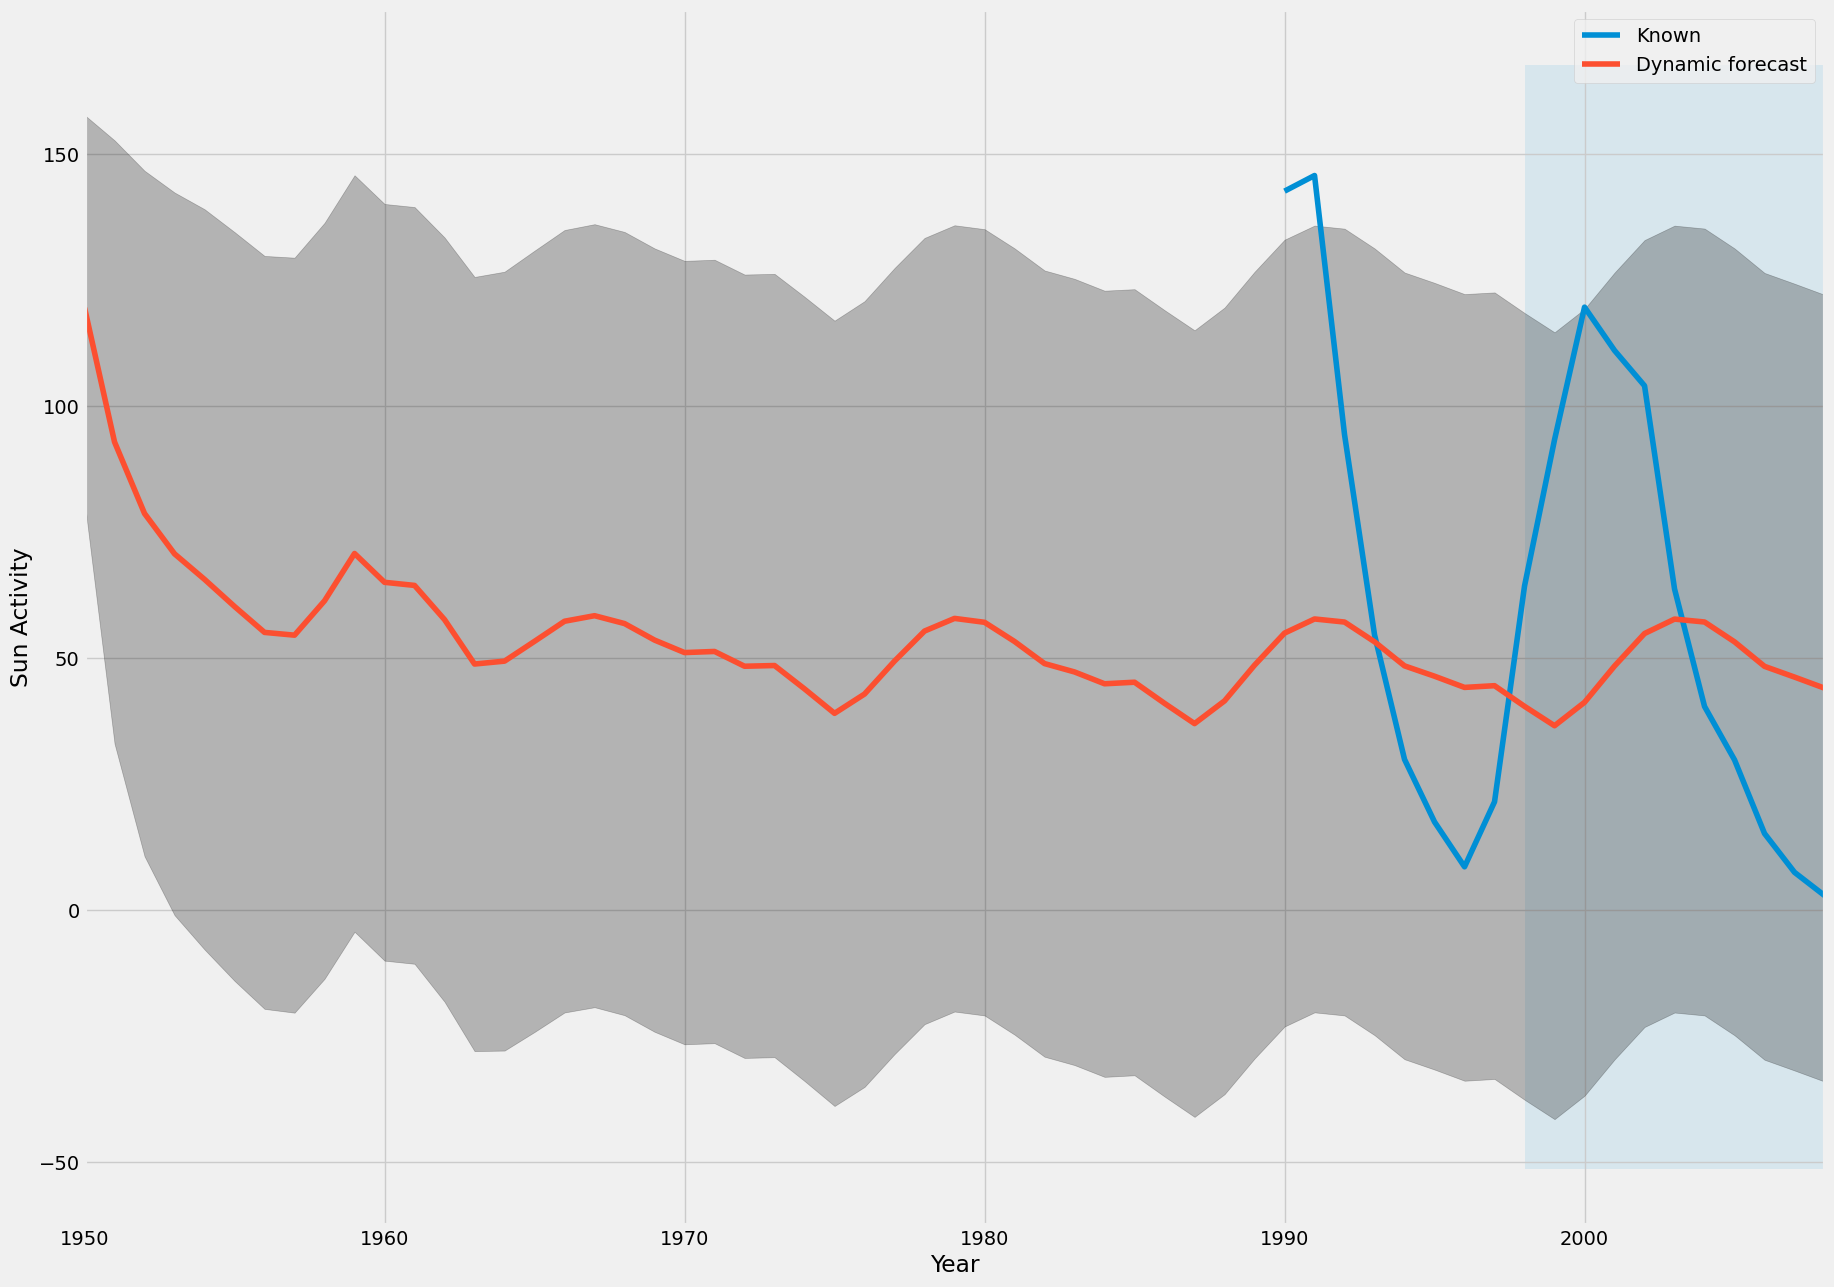

In [28]:
ax = y['1990':].plot(label='Known', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
alpha=.1, zorder=-1)
ax.set_xlabel('Year')
ax.set_ylabel('Sun Activity')
plt.legend()
plt.show()

In [29]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':] # Отримуємо середню квадратичну похибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Mean squared error of predictions = {}'.format(round(mse, 2)))

Mean squared error of predictions = 1946.89


In [33]:
# Отримуємо прогноз на 100 кроків у перед
pred_uc = results.get_forecast(steps=100)
# Отримуємо інтервал прогнозу
pred_ci = pred_uc.conf_int()

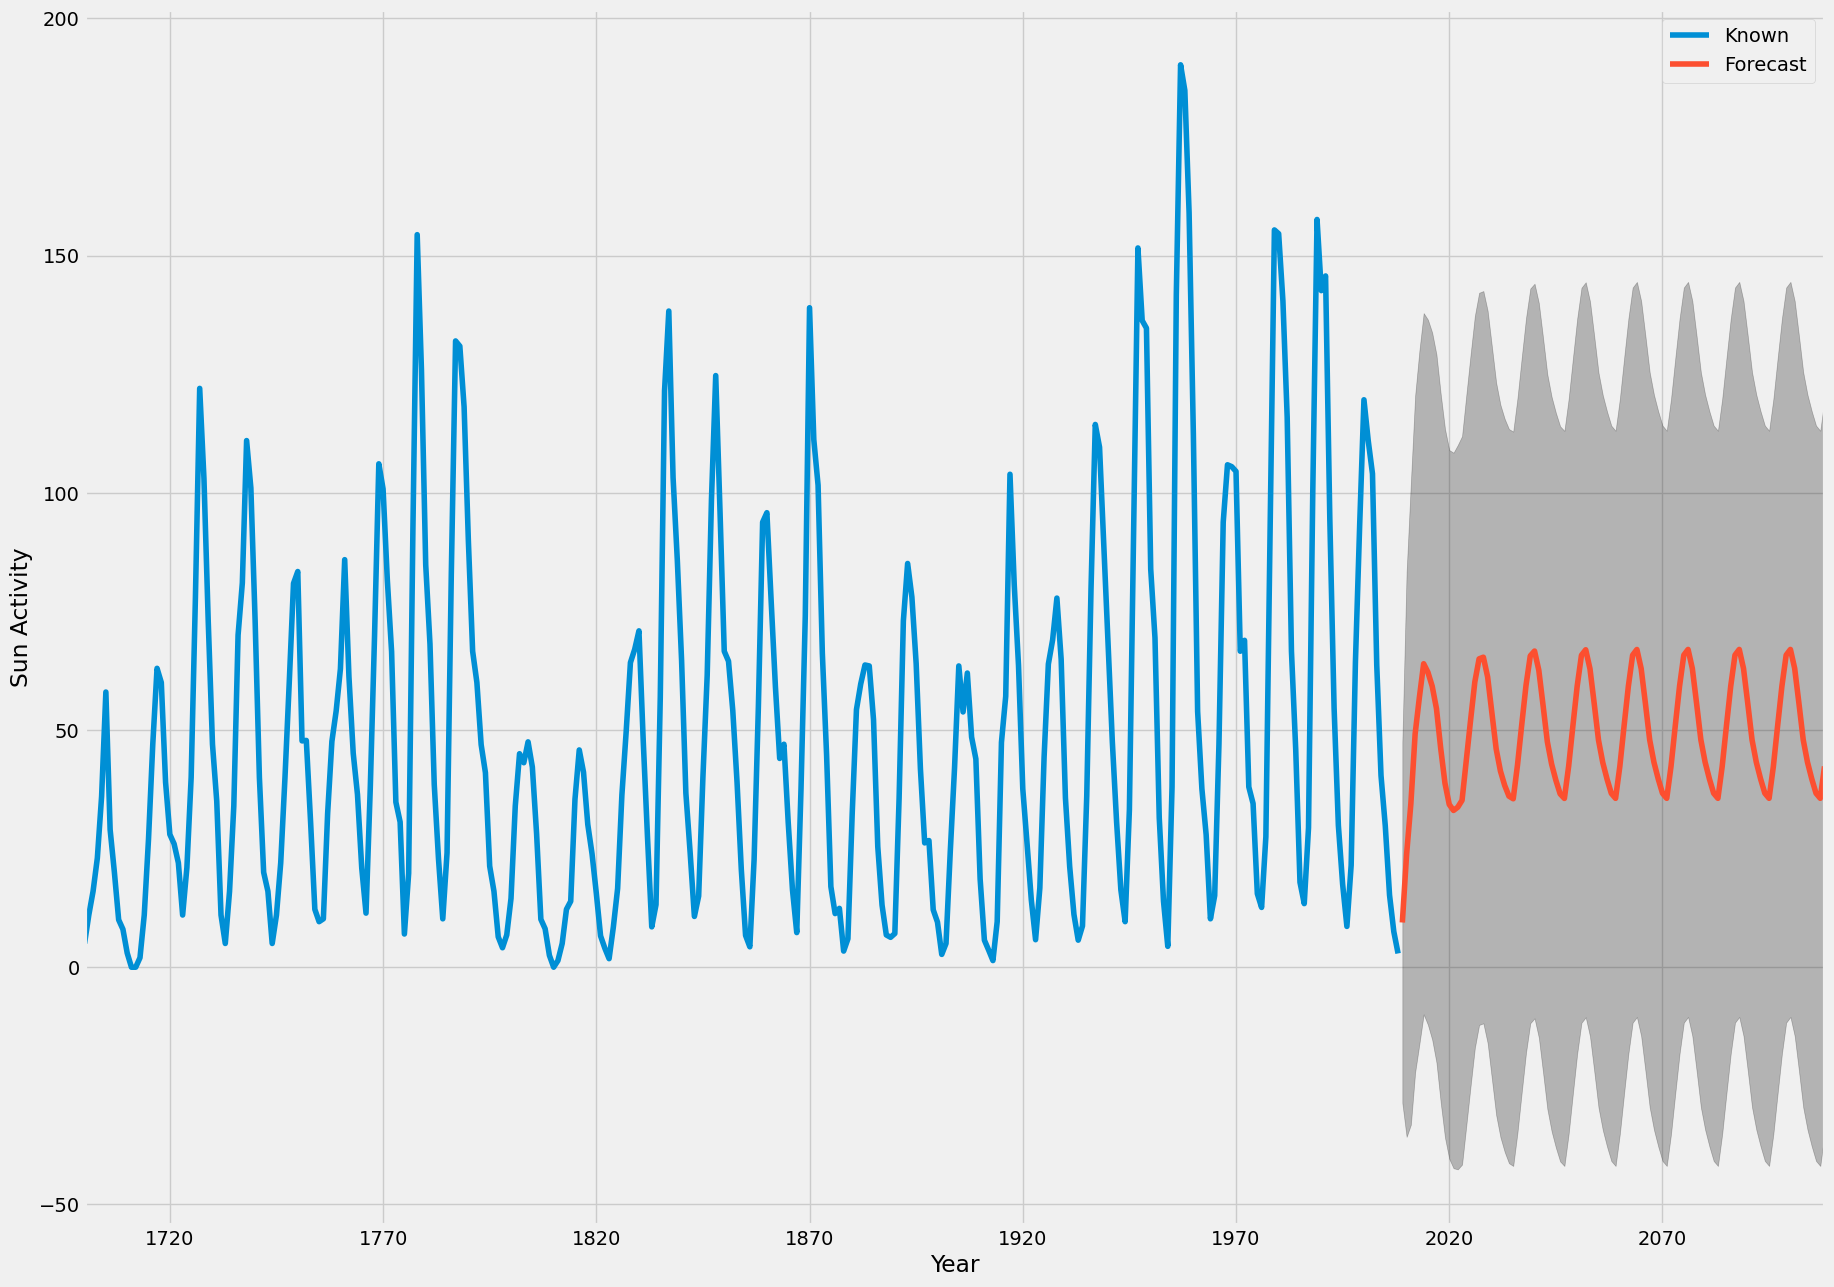

In [34]:
ax = y.plot(label='Known', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Sun Activity')
plt.legend()
plt.show()